### Load a stack and plot histogram of slab (diameter, snr)

In [19]:
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats # for KDE

# if using a Jupyter notebook, include:
%matplotlib inline

import bimpy

In [33]:
path = '/home/cudmore/data/nathan/SAN4/aicsAnalysis/testing/SAN4_tail_ch2.tif'

myStack = bimpy.bStack(path=path, loadImages=False, loadTracing=True)



bVascularTracing.__init__() loadTracing: True path: /home/cudmore/data/nathan/SAN4/aicsAnalysis/testing/SAN4_tail_ch2.tif
    loaded nodes: 1232 edges: 1543 slabs: 45273


n: 45273
numNan: 7417
theMin: 1.0862068965517242
theMax: 255.0
kde: <scipy.stats.kde.gaussian_kde object at 0x7ff0422b13d0> xx: 200


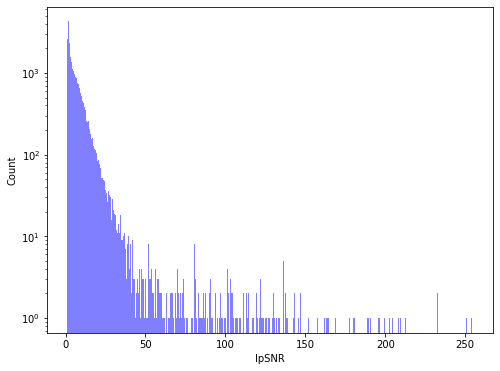

In [36]:
# plot

d2 = myStack.slabList.d2
lpSNR = myStack.slabList.lpSNR

n = len(d2)
print('n:', n)

# count the number of nan's in d2
numNan = np.count_nonzero(np.isnan(d2))
print('numNan:', numNan)

if 1:
    statName = 'd2'
    thisStat = d2

if 1:
    statName = 'lpSNR'
    thisStat = lpSNR

# remove nan
thisStat = thisStat[~np.isnan(thisStat)]

theMin = np.min(thisStat)
theMax = np.max(thisStat)
print('theMin:', theMin)
print('theMax:', theMax)

bins = 'auto'

kde = stats.gaussian_kde(thisStat) # returns type 'gaussian_kde'
xx = np.linspace(theMin, theMax, 200) # (start, stop, num)
print('kde:', kde, 'xx:', len(xx))

fig, ax = plt.subplots(figsize=(8,6))
#ax.hist(x, normed=True, bins=bins, alpha=0.3)
n, bins, patches = ax.hist(x=thisStat,
        bins=bins,
        density=False,
        log=True,
        histtype='bar',
        facecolor='b',
        alpha=0.5)

# todo: this works but scale is not useful
#ax.plot(xx, kde(xx))


plt.xlabel(statName)
plt.ylabel('Count')

plt.show()
